## Context

**This is a fake / alternative proof-of-concept model with alternative non-credential data.**

A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable economic model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. Some startups become unicorns: privately held startup companies valued at over US$1 billion. [Source of information: Wikipedia]

Startups play a major role in economic growth. They bring new ideas, spur innovation, create employment thereby moving the economy. There has been an exponential growth in startups over the past few years. Predicting the success of a startup allows investors to find companies that have the potential for rapid growth, thereby allowing them to be one step ahead of the competition.

## Objective

The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

Predicting the success of a startup allows investors to find companies that have the potential for rapid growth, thereby allowing them to be one step ahead of the competition.

## About the Data

agefirstfunding_year – quantitative

agelastfunding_year – quantitative

relationships – quantitative

funding_rounds – quantitative

fundingtotalusd – quantitative

milestones – quantitative

agefirstmilestone_year – quantitative

agelastmilestone_year – quantitative

state – categorical

industry_type – categorical

has_VC – categorical

has_angel – categorical

has_roundA – categorical

has_roundB – categorical

has_roundC – categorical

has_roundD – categorical

avg_participants – quantitative

is_top500 – categorical

status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed) 

## Set Up


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Procecssing

In [ ]:
Data = pd.read_csv('startup_data.csv')
Data.head(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
Data.dtypes

Unnamed: 0                    int64
state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
id                           object
city                         object
Unnamed: 6                   object
name                         object
labels                        int64
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate               

In [ ]:
Data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


Select columns to use.

In [ ]:
excluded_col = ['Unnamed: 0', 'zip_code', 'id', 'Unnamed: 6', 'state_code.1', 'founded_at', 'first_funding_at', 'last_funding_at', 'object_id', 'name', 'city']

selected_data = Data.drop(excluded_col, axis = 1)

### Null Treatment


#### Tier 1 - 50%

Tier 1 - for featues with more than 50% missing values, just drop them.

In [ ]:
after_null50 = selected_data.dropna(thresh = selected_data.shape[0]*0.5, axis = 1)

print('Number of dropped columns in tire 1: ', selected_data.shape[1] - after_null50.shape[1])

Number of dropped columns in tire 1:  1


#### Tier 2 - 30%

Tire 2 - for features with 30% - 50% missing values, impute with means / medians.

Impute means for features with symmetric distributions, impute medians for ones with skewed distributions.

In [ ]:
columns_with_na = after_null50.columns[after_null50.isna().any()].tolist()

1 - after_null50[columns_with_na].count()/after_null50.shape[0]

age_first_milestone_year    0.16468
age_last_milestone_year     0.16468
dtype: float64

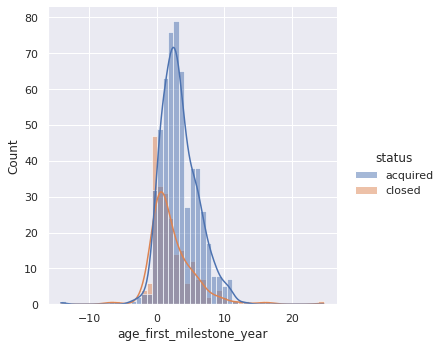

In [ ]:
# distribution plots
sns.displot(data = after_null50, 
            x = columns_with_na[0], 
            kde = True, 
            hue = "status")

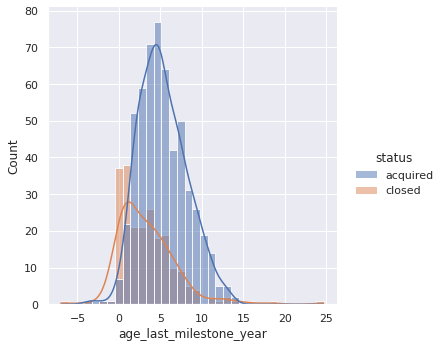

In [ ]:
# distribution plots
sns.displot(data = after_null50, 
            x = columns_with_na[1], 
            kde = True, 
            hue = "status")

Both features are skewed for closed cases, so impute medians.

In [ ]:
# replace na with medians
after_null = after_null50.fillna(after_null50.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


#### Tier 4 - 10%

If we have any tier 1 featues which have less than 10% missing values, we could utilize knn data mining to impute missing values. However, we don't have this kind of case here.

#### Flagging columns with imputations


If we impute missing values, then include a boolean column/feature that flags whether there was originally a NULL there.


In [ ]:
for col in columns_with_na:
  after_null[col + '_flag'] = selected_data[col].isna()

## Exploratory Data Analysis

### Correlation Heatmap


In [ ]:
# scaling data before computing correlation matrix
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# copy
after_null_scale = after_null.copy()

# Select Continuous features 
from sklearn.compose import make_column_selector as selector
num_columns_selector = selector(dtype_exclude=[object, bool])
num_columns = num_columns_selector(after_null)

# transform by scaling
after_null_scale[num_columns] = min_max_scaler.fit_transform(after_null_scale[num_columns])
after_null_scale

,state_code,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_first_milestone_year_flag,age_last_milestone_year_flag
0,CA,0.494494,0.367152,1.0,0.365061,0.389409,0.484841,0.432611,0.047619,0.222222,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,acquired,False,False
1,CA,0.342036,0.005562,1.0,0.458030,0.615461,0.544988,0.442121,0.142857,0.333333,...,0.0,0.0,1.0,1.0,1.0,0.250000,1.0,acquired,False,False
2,CA,0.212867,0.039515,1.0,0.325749,0.325749,0.402200,0.290656,0.079365,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.200000,1.0,acquired,False,False
3,CA,0.344460,0.005020,1.0,0.393572,0.464142,0.519179,0.410478,0.079365,0.222222,...,0.0,0.0,1.0,1.0,1.0,0.155553,1.0,acquired,False,False
4,CA,0.358127,0.002398,0.0,0.292368,0.346291,0.365677,0.222272,0.031746,0.111111,...,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,closed,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,0.356975,0.002702,1.0,0.309102,0.309102,0.379636,0.363880,0.142857,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,acquired,False,False
919,MA,0.498839,0.366166,0.0,0.526742,0.590579,0.519179,0.410478,0.015873,0.222222,...,0.0,0.0,1.0,0.0,0.0,0.111113,1.0,closed,False,False
920,CA,0.347079,0.005263,0.0,0.566939,0.566939,0.596462,0.505232,0.079365,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.466667,1.0,closed,False,False
921,CA,0.351500,0.003328,1.0,0.316894,0.383922,0.384220,0.342094,0.190476,0.111111,...,0.0,1.0,1.0,0.0,0.0,0.000000,1.0,acquired,False,False


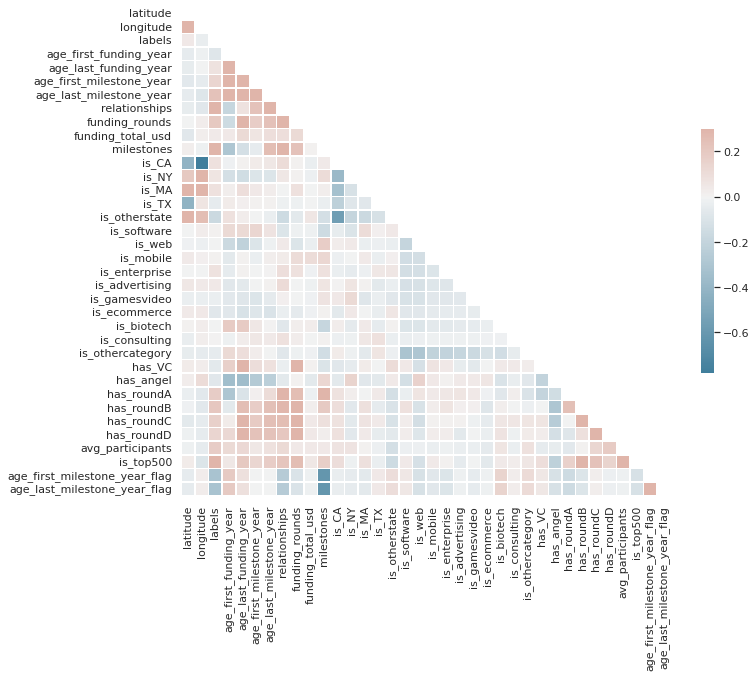

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = after_null_scale.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



Create another two dataset variants. One dropped high-correlated features, another one would be transformed by PCA.

## Preprocessing for Models

### Encoding Categorical Features

In [ ]:
# drop status and labels column since the target is age_last_funding_year  
after_null.drop(columns=['status', 'labels'], inplace=True)

In [ ]:
# find columns need to transform
data_type = [col for col in after_null if col.startswith('is')] + [col for col in after_null if col.startswith('has')]

# transform these columns from int dtype into object dtype
after_null[data_type] = after_null[data_type].astype(str)
after_null['age_first_milestone_year_flag'] = after_null['age_first_milestone_year_flag'].astype(str)
after_null['age_last_milestone_year_flag'] = after_null['age_last_milestone_year_flag'].astype(str)


In [ ]:
# encoding label
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#label_encoded = label_encoder.fit_transform(after_null['labels'])

# Select features based on their data type
from sklearn.compose import make_column_selector as selector
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(after_null)

# encoding nominal categorical predictors
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
categorical_encoded = onehot_encoder.fit_transform(after_null[categorical_columns])

In [ ]:
from numpy.ma.extras import column_stack

# Creating this DataFrame for encoded categorial features
cat_features = pd.DataFrame(categorical_encoded, columns=onehot_encoder.get_feature_names(categorical_columns))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Scaling Continuous Features

In [ ]:
# subtract Continuous features
num_features_raw = after_null[[col for col in after_null.columns if col not in categorical_columns]]

# standardize continuous features
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()

num_scaled = st_scaler.fit_transform(num_features_raw)

num_features = pd.DataFrame(data = num_scaled, columns = num_features_raw.columns)

# combine encoded features with otehr Continuous features
features = pd.concat([num_features, cat_features], axis=1).drop(columns = 'age_last_funding_year')

# target variable as df
target = after_null[['age_last_funding_year']]

In [ ]:
features.head()

,latitude,longitude,age_first_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,...,has_roundC_0,has_roundC_1,has_roundD_0,has_roundD_1,is_top500_0,is_top500_1,age_first_milestone_year_flag_False,age_first_milestone_year_flag_True,age_last_milestone_year_flag_False,age_last_milestone_year_flag_True
0,1.027268,1.451271,0.005448,0.593256,0.664551,-0.648696,0.495665,-0.132140,0.876138,-0.981320,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.341900,-0.823630,1.151960,1.452719,0.767284,0.177541,1.215002,0.077455,-0.636819,1.020191,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,-1.501922,-0.610018,-0.479349,-0.587632,-0.868805,-0.373284,-0.943010,-0.120401,0.119660,0.619888,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,-0.320134,-0.827040,0.357050,1.083926,0.425477,-0.373284,0.495665,0.076928,-0.636819,0.264047,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-0.197397,-0.843535,-0.891013,-1.109524,-1.607464,-0.786402,-0.223673,-0.127260,-0.636819,-0.981320,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


## Building Models

### Train Test Slpit

In [ ]:
from sklearn.model_selection import train_test_split

# 80% train dataset, 20% test dataset
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Ordinary Least Squares Regression

In [ ]:
# define a function fit model, predict and print model performance 
def run_experiment(model):

  # fit
  model.fit(x_train, y_train)

  # predict
  y_pred = model.predict(x_test)

  # evaluate
  from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
  print("R^2 : ", r2_score(y_test, y_pred))
  print("MAE :", mean_absolute_error(y_test,y_pred))
  print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

#### Model Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
# initiate model
ols_model = LinearRegression(fit_intercept=True)

# run
run_experiment(ols_model)

R^2 :  -9.437088078077026e+21
MAE : 38193987122.613716
RMSE: 244131839093.71573


### Regularization - Lasso regression

#### Hyperparameter Tuning

In [ ]:
# set alpha parameter cases for cv 
params = {'alpha': (np.logspace(-4, 2, 100))} 

# initiate lasso estimator
from sklearn.linear_model import Lasso
lasso = Lasso(normalize=True)

# set GridSearchCV
from sklearn.model_selection import GridSearchCV
lasso_model = GridSearchCV(lasso, params, cv = 4, scoring='r2')

# fit models
lasso_model.fit(x_train, y_train)


In [ ]:
# print best alpha parameter
print('Best alpha parameter: ', lasso_model.best_params_)
print('Best score: ', lasso_model.best_score_)

Best alpha parameter:  {'alpha': 0.0024770763559917113}
Best score:  0.8710593335251431


#### Model Evaluation

In [ ]:
# initiate final lasso model
final_lasso_model = Lasso(alpha = 0.0024770763559917113, normalize = True)

# run
run_experiment(final_lasso_model)

R^2 :  0.8354322491307796
MAE : 0.6649265576958248
RMSE: 1.0194778289487378


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Check effective / selected features in Lasso Regression.

In [ ]:
# Check the values of the importance of coefficients of Lasso regression.
importance = np.abs(final_lasso_model.coef_)

# filter effective features
np.array(features.columns)[importance > 0]

array(['age_first_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'funding_rounds', 'funding_total_usd',
       'state_code_GA', 'state_code_MA', 'is_MA_0',
       'category_code_biotech', 'category_code_games_video',
       'category_code_search', 'category_code_semiconductor',
       'category_code_transportation', 'category_code_web',
       'is_gamesvideo_0', 'is_biotech_0', 'is_biotech_1', 'has_VC_0',
       'has_VC_1', 'has_roundB_0', 'has_roundC_0', 'has_roundC_1',
       'has_roundD_0', 'has_roundD_1',
       'age_first_milestone_year_flag_False',
       'age_first_milestone_year_flag_True',
       'age_last_milestone_year_flag_False',
       'age_last_milestone_year_flag_True'], dtype=object)

### Visualize Learning Curve

Plot training sample size against training scores (one curve) and validation scores to visualize the degree of overfit (gap between curves diverges) or underfit
(curves converge but at a low accuracy).


In [ ]:
train_sizes = [1, 103, 205, 308, 410, 513, 615]

from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(estimator = final_lasso_model, 
                                                              X = features, 
                                                              y = target,
                                                              cv = 3,
                                                              scoring = 'neg_mean_squared_error',
                                                              train_sizes = train_sizes)

In [ ]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

(0.0, 40.0)

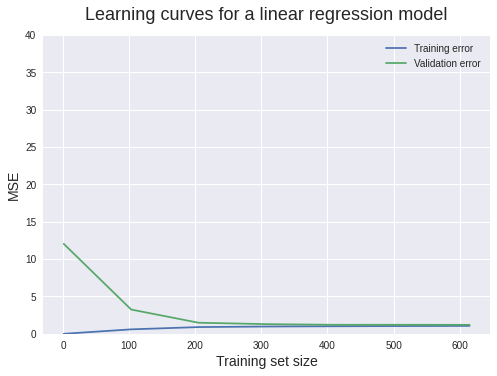

In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

As the chart shows, there's no overfit nor underfit in our model.